Task 1

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('wine.csv')

In [7]:
print(df.head())

   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None


distribution of features using histograms:

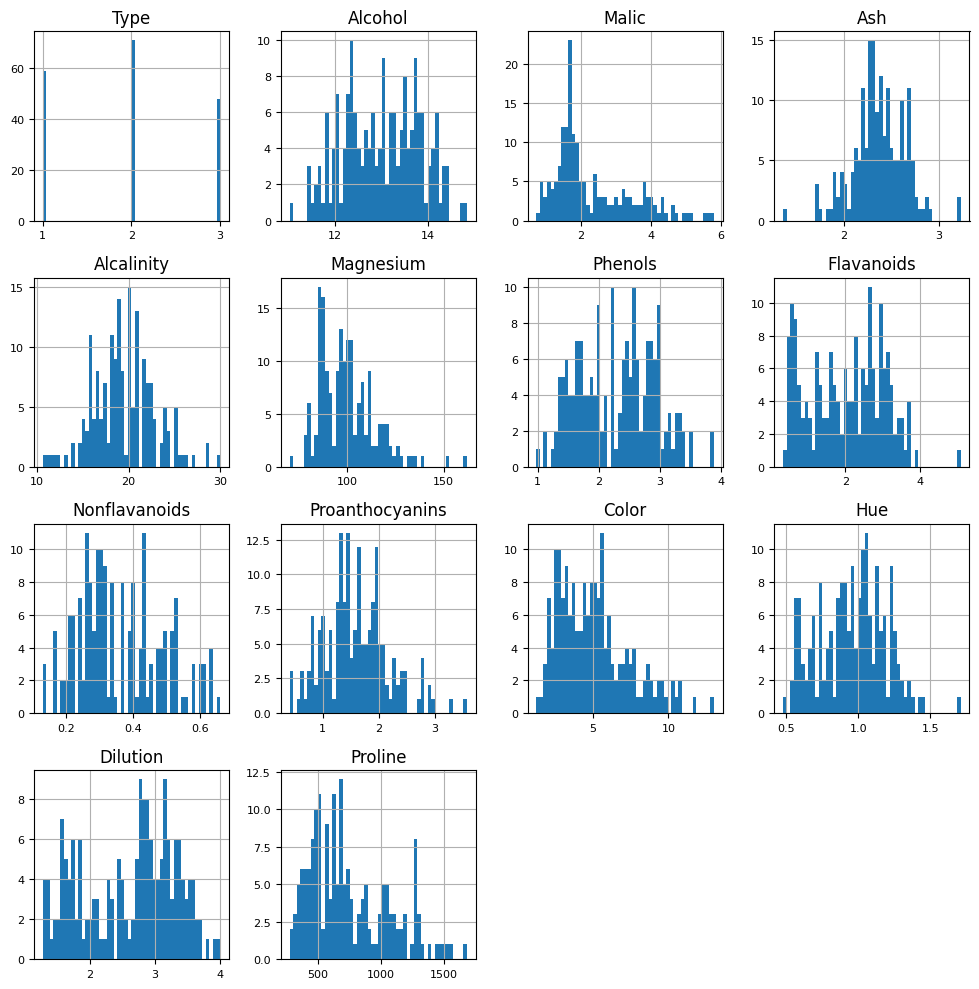

In [9]:
df.hist(figsize=(10, 10), bins=50, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

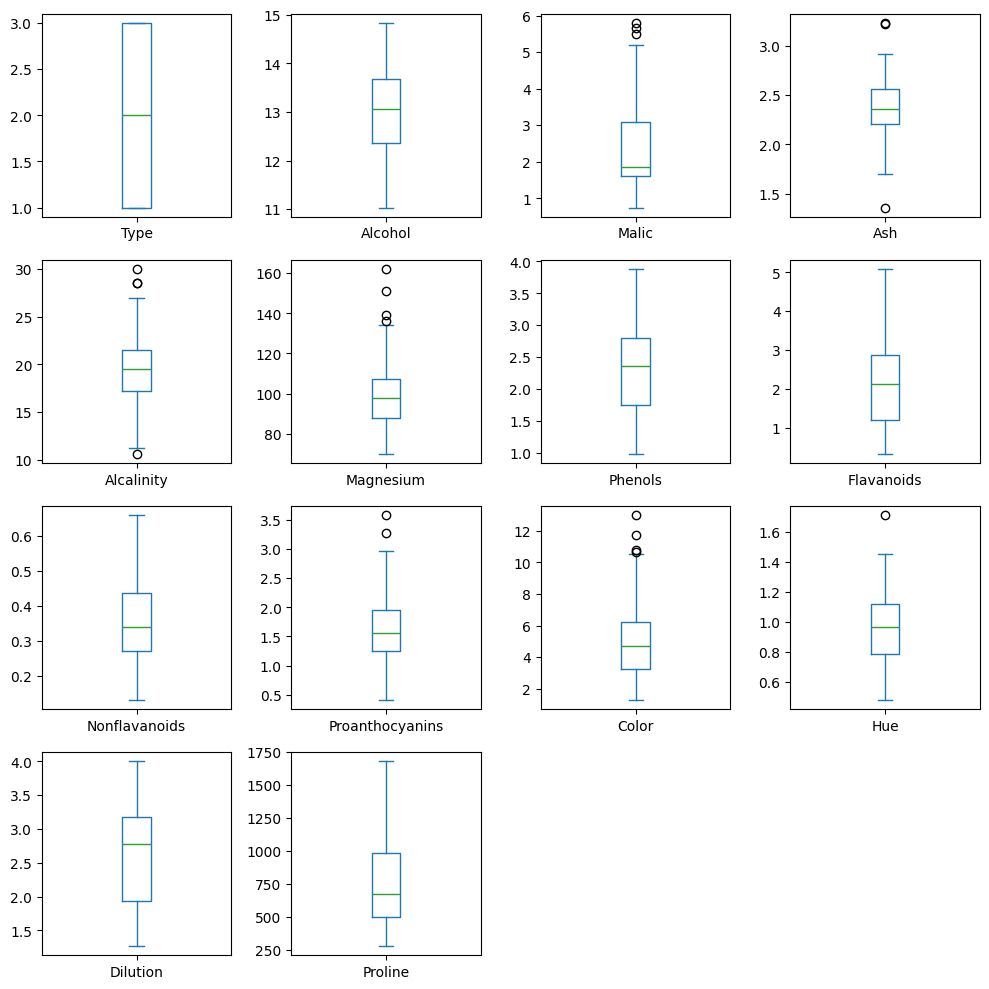

In [10]:
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(10,10))
plt.tight_layout()
plt.show()

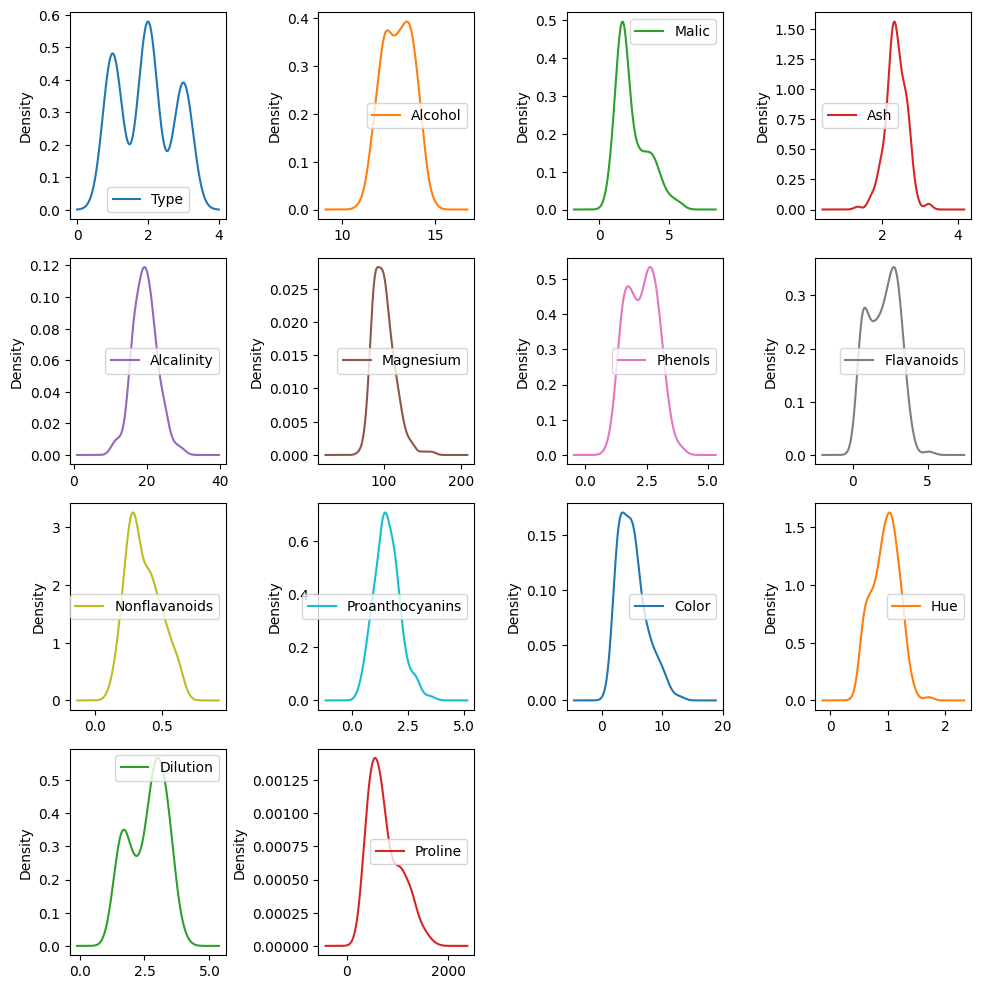

In [11]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(10,10))
plt.tight_layout()
plt.show()

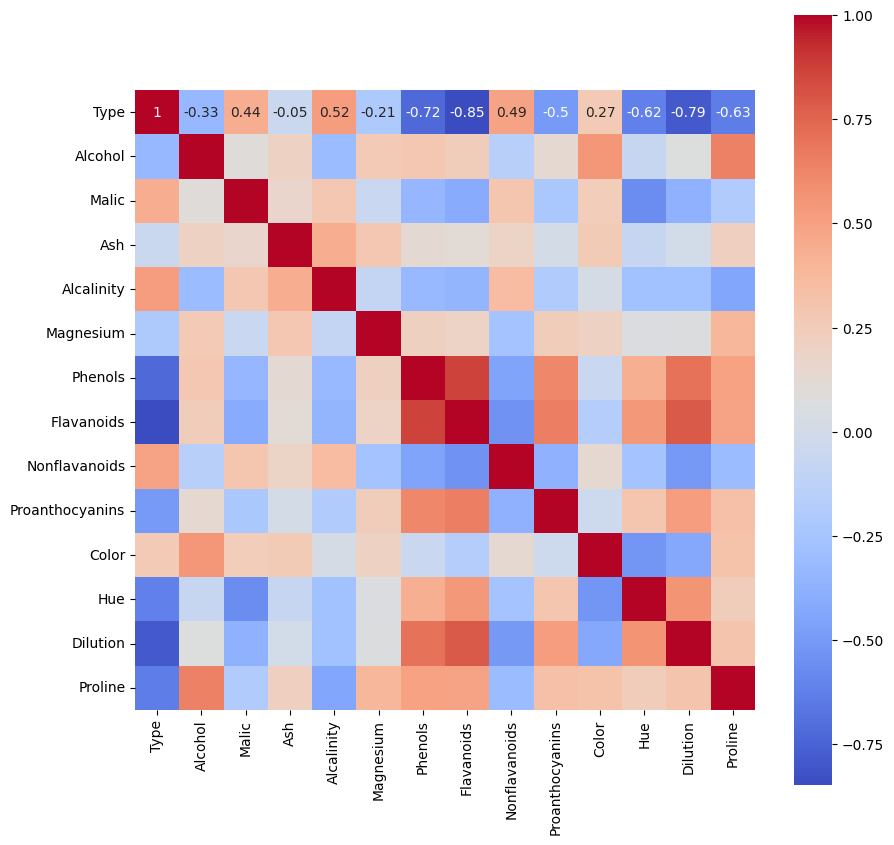

In [12]:
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, square=True, cmap='coolwarm')
plt.show()

Task 2

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [21]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [22]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)

In [23]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [24]:
pca = PCA()
pca.fit(df_scaled)

PCA()

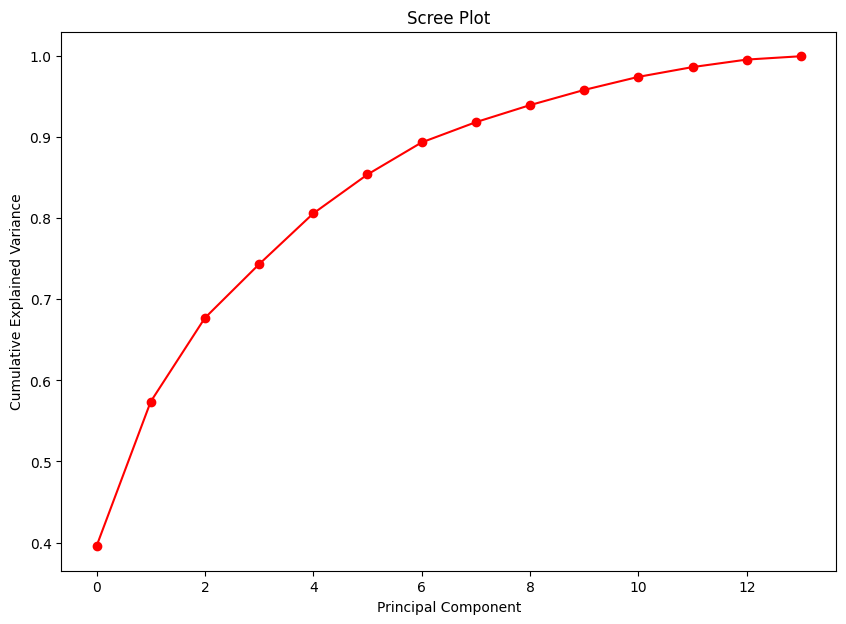

In [25]:
plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [26]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

In [33]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df_scaled)

In [34]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component ' + str(i) for i in range(1, 4)])

In [35]:
principalDf

,Principal Component 1,Principal Component 2,Principal Component 3
0,-3.522934,-1.453098,-0.164795
1,-2.528858,0.330019,-2.026707
2,-2.785029,-1.036936,0.983238
3,-3.922588,-2.768210,-0.174968
4,-1.407511,-0.867773,2.025829
...,...,...,...
173,3.627996,-2.206617,-0.343668
174,2.942729,-1.752263,0.207480
175,3.027272,-2.756040,-0.940803
176,2.755222,-2.293784,-0.550474


Task 3

In [36]:
from sklearn.cluster import KMeans

In [37]:
kmeans = KMeans(n_clusters=3)

In [38]:
kmeans.fit(df_scaled)

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\DELL\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\DELL\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp,

KMeans(n_clusters=3)

In [39]:
df['Cluster'] = kmeans.labels_

In [40]:
import matplotlib.pyplot as plt

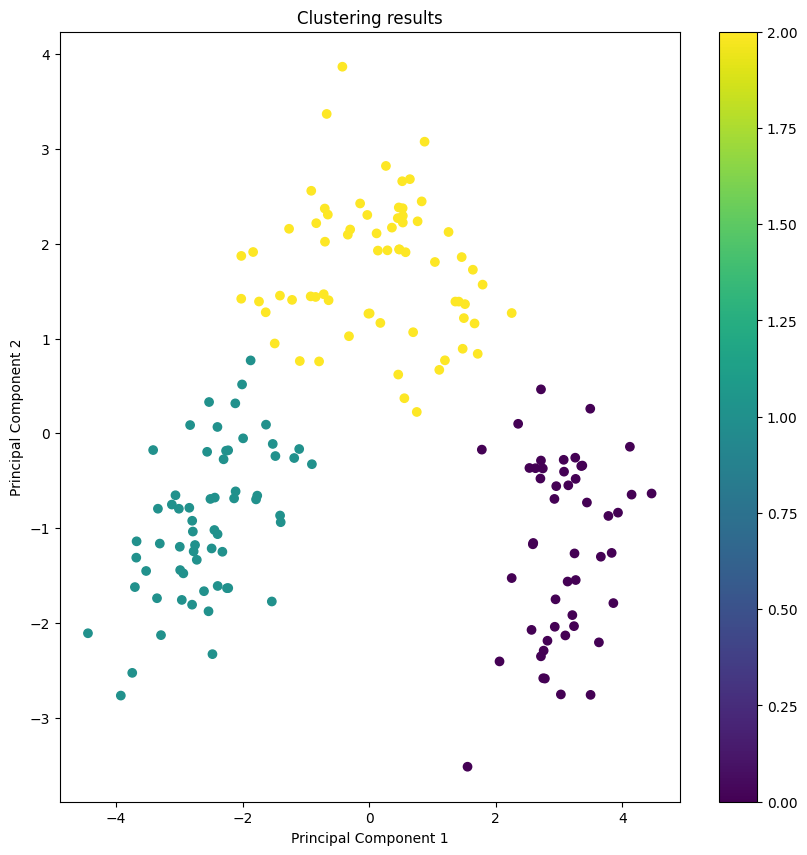

In [41]:
plt.figure(figsize=(10, 10))
plt.scatter(principalDf['Principal Component 1'], principalDf['Principal Component 2'], c=df['Cluster'])
plt.title('Clustering results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

In [42]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [43]:
silhouette = silhouette_score(df_scaled, df['Cluster'])
print('Silhouette Score: ', silhouette)

Silhouette Score:  0.30648398324833453


In [44]:
db = davies_bouldin_score(df_scaled, df['Cluster'])
print('Davies-Bouldin Index: ', db)

Davies-Bouldin Index:  1.315707552261773


Task 4

In [45]:
kmeans = KMeans(n_clusters=3)

In [46]:
kmeans.fit(principalDf)

KMeans(n_clusters=3)

In [47]:
principalDf['Cluster'] = kmeans.labels_

In [48]:
import matplotlib.pyplot as plt

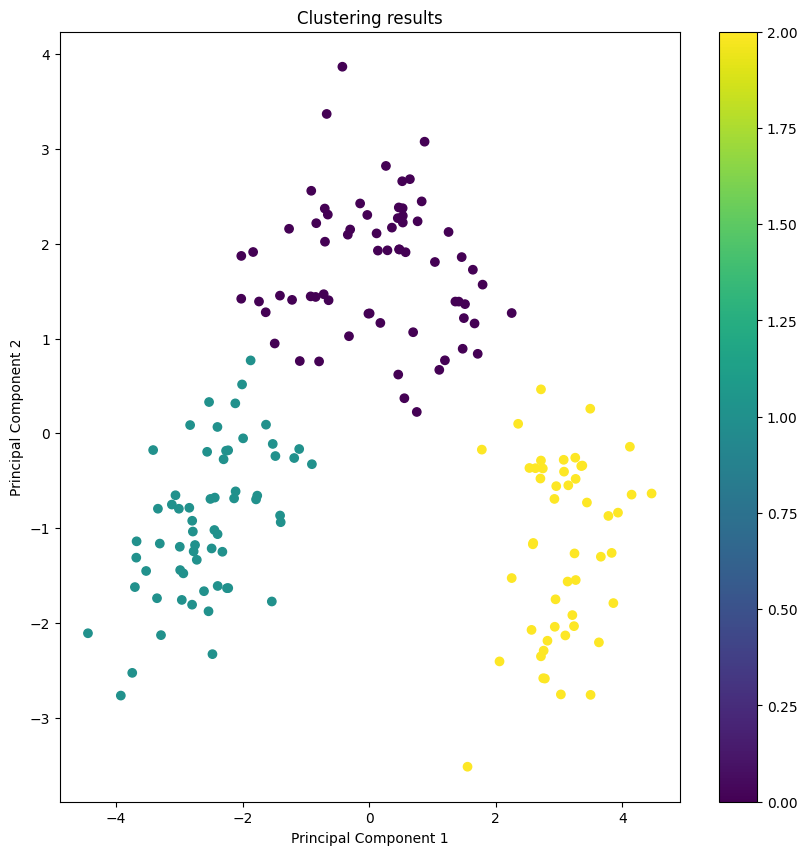

In [49]:
plt.figure(figsize=(10, 10))
plt.scatter(principalDf['Principal Component 1'], principalDf['Principal Component 2'], c=principalDf['Cluster'])
plt.title('Clustering results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

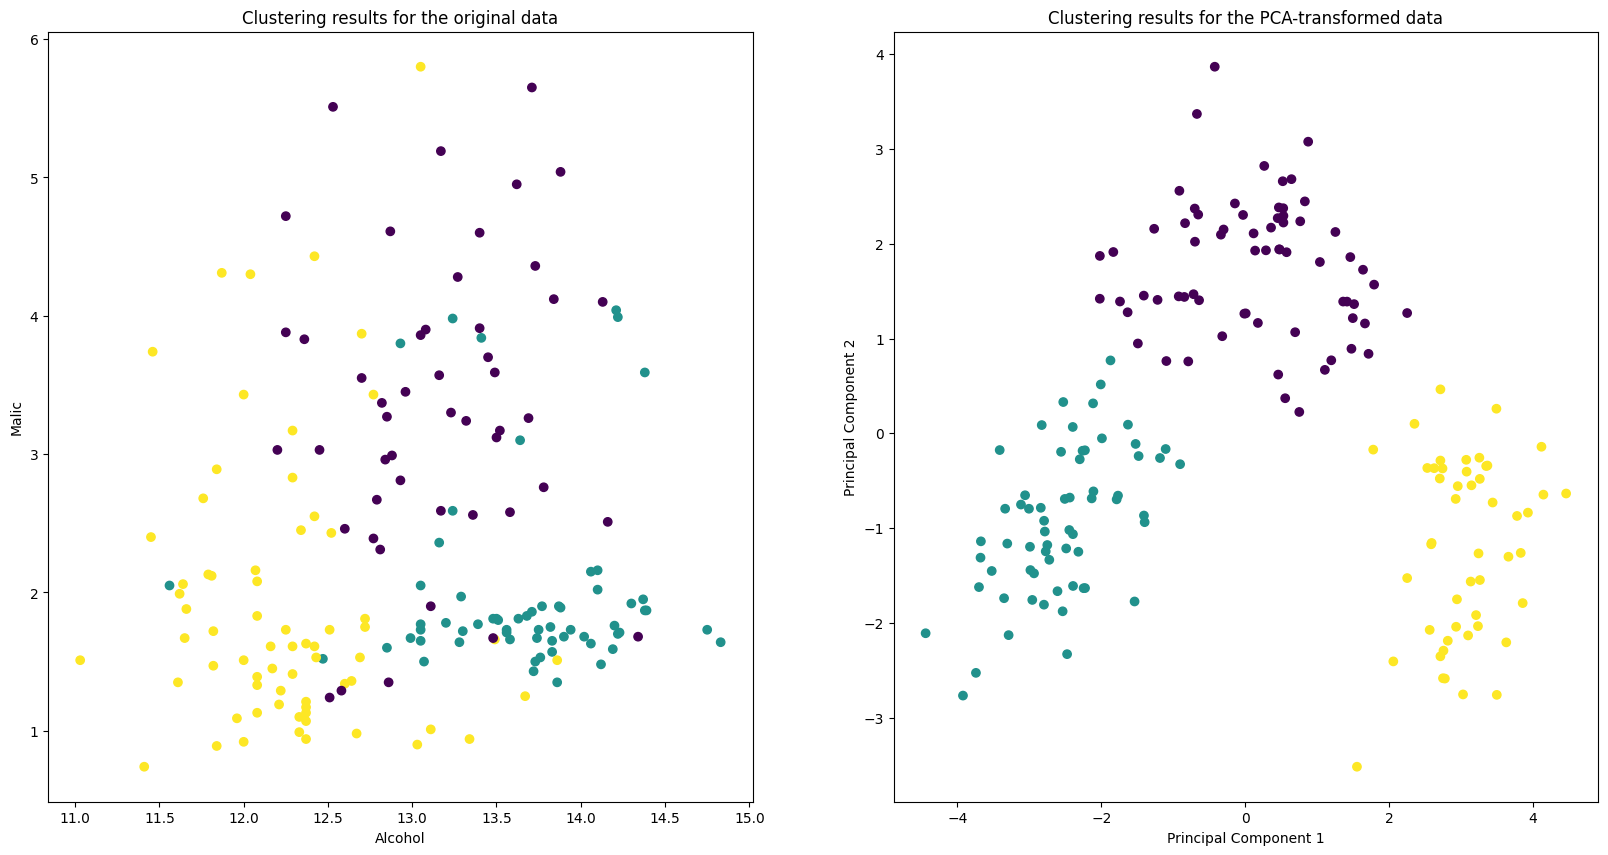

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Scatter plot for the original data
# Scatter plot for the original data
ax[0].scatter(df['Alcohol'], df['Malic'], c=df['Cluster'])
ax[0].set_title('Clustering results for the original data')
ax[0].set_xlabel('Alcohol')
ax[0].set_ylabel('Malic')

# Scatter plot for the PCA-transformed data
ax[1].scatter(principalDf['Principal Component 1'], principalDf['Principal Component 2'], c=principalDf['Cluster'])
ax[1].set_title('Clustering results for the PCA-transformed data')
ax[1].set_xlabel('Principal Component 1')
ax[1].set_ylabel('Principal Component 2')

plt.show()

Task 5

Similarities:

 * If PCA was able to preserve the structure of the data, the clusters formed on the original and PCA-transformed data should be similar. This means that the same data points should belong to the same clusters in both cases.
 * The number of clusters should be the same in both cases, assuming you used the same parameters for the clustering algorithm.

Differences:

 * The actual cluster centers might be different between the original and PCA-transformed data because PCA involves a change of basis (rotation and scaling of the data).
 * If the original data is high-dimensional, PCA reduces its dimensionality by projecting it onto a lower-dimensional space. This might result in some loss of information, which could affect the clustering results. For example, clusters that are separable in the high-dimensional space might overlap in the lower-dimensional space.
 * The interpretation of the clusters can be different. In the original space, the clusters can be interpreted in terms of the original features. In the PCA-transformed space, the clusters are interpreted in terms of the principal components, which are combinations of the original features.

Dimensionality reduction, such as Principal Component Analysis (PCA), can have a significant impact on the performance of clustering algorithms. Here are some key points to consider:

 * Computational Efficiency: High-dimensional data can be computationally expensive for clustering algorithms. Reducing the dimensionality can make the algorithm run faster and use less memory.
 * Noise Reduction: Dimensionality reduction can help remove noise and redundant features from the data, improving the quality of the clusters.
 * Visualizability: Lower-dimensional data (2D or 3D) can be easily visualized, which can help in understanding and interpreting the clustering results.
 * Avoiding the Curse of Dimensionality: In high-dimensional spaces, data becomes sparse, and the distance between data points tends to be uniform, making clustering challenging. Dimensionality reduction can mitigate this issue.
   
However, there are also potential downsides:

 * Information Loss: While PCA tries to preserve the variance in the data, some information is inevitably lost during the dimensionality reduction process, which could potentially impact the clustering performance.
 * Interpretability: The new features (principal components) created by PCA are combinations of the original features and may not be directly interpretable.
 * Parameter Selection: Choosing the number of dimensions to reduce to (i.e., the number of principal components to keep) can be tricky and may require additional techniques to determine.

Advantages of using PCA before Clustering:

 * Noise Reduction: PCA can help to remove noise and redundant features from the data, which can improve the quality of the clusters.
 * Computational Efficiency: High-dimensional data can be computationally expensive for clustering algorithms. Reducing the dimensionality can make the algorithm run faster and use less memory.
 * Avoiding the Curse of Dimensionality: In high-dimensional spaces, data becomes sparse, and the distance between data points tends to be uniform, making clustering challenging. Dimensionality reduction can mitigate this issue.
 * Visualizability: Lower-dimensional data (2D or 3D) can be easily visualized, which can help in understanding and interpreting the clustering results.
   
Disadvantages of using PCA before Clustering:

 * Information Loss: While PCA tries to preserve the variance in the data, some information is inevitably lost during the dimensionality reduction process, which could potentially impact the clustering performance.
 * Interpretability: The new features (principal components) created by PCA are combinations of the original features and may not be directly interpretable.
 * Parameter Selection: Choosing the number of dimensions to reduce to (i.e., the number of principal components to keep) can be tricky and may require additional techniques to determine.
   
Clustering directly on the Original Dataset:

 * Preservation of Original Features: Clustering directly on the original dataset preserves all original features, which might be important for the clustering task.
 * Interpretability: Since the original features are preserved, the resulting clusters can be easier to interpret.

Task 6

summarization

 * Data Exploration: We started with exploring the dataset using histograms, box plots, and density plots. This helped us understand the distribution of features in the dataset.
 * Standardization: We standardized the features to ensure they have a mean of 0 and a standard deviation of 1. This is an important preprocessing step before applying many machine learning algorithms.
 * PCA for Dimensionality Reduction: We applied Principal Component Analysis (PCA) to reduce the dimensionality of the dataset. This helped us transform the high-dimensional data into a lower-dimensional space, making it easier to visualize and process.
 * Determining Optimal Number of Principal Components: We used techniques like the scree plot and cumulative explained variance to determine the optimal number of principal components to keep after PCA.
 * Clustering: We applied the K-means clustering algorithm to both the original and PCA-transformed datasets. This helped us group similar data points together.
 * Cluster Visualization: We visualized the clustering results using scatter plots. This helped us see how the data points were grouped into clusters.
 * Cluster Evaluation: We evaluated the clustering performance using metrics such as the silhouette score and the Davies–Bouldin index. These metrics gave us a quantitative measure of the quality of our clusters.
 * Comparison of Clustering Results: We compared the clustering results from the original dataset and the PCA-transformed data. This helped us understand the impact of PCA on the clustering results.
 * Reflection on Dimensionality Reduction and Clustering: We discussed the impact of dimensionality reduction on clustering performance and the trade-offs between using PCA and clustering directly on the original dataset.

practical implications of using PCA and clustering in data analysis.

 * Data Compression: PCA can be used to reduce the dimensionality of large datasets, making them easier to work with. It can compress the data by discarding features that contribute less to the variance, which can lead to significant savings in storage and processing time.
 * Noise Reduction: PCA can also help in noise reduction by discarding the components with smaller variance, which are often considered as ‘noise’. This can improve the performance of subsequent data analysis tasks, including clustering.
 * Improved Visualization: PCA can project high-dimensional data into 2D or 3D space, making it possible to visualize the data and any inherent groupings, which can be very useful for exploratory data analysis.
 * Efficient Clustering: Clustering can be more efficient on lower-dimensional data produced by PCA. High-dimensional data can suffer from the “curse of dimensionality”, where the distance between any two points becomes less meaningful, making clustering challenging.
 * Discovery of Patterns and Groups: Clustering can help discover patterns and groups in the data that might not be apparent in the raw data. These patterns can provide valuable insights and can be useful in many applications like customer segmentation, anomaly detection, and more.
 * Interpretability: The clusters formed can often be interpreted and profiled in terms of the input features, providing insights about the dataset. For example, in customer segmentation, the customers in a cluster might represent a particular segment that can be targeted with specific marketing strategies.
   
However, there are also some challenges and considerations:

 * Information Loss in PCA: While PCA reduces dimensionality, it also discards some information. The discarded components might still contain information that’s relevant for the analysis.
 * Choosing the Number of Components in PCA: There’s no definitive way to choose the number of principal components to keep. It’s a trade-off between keeping variance (information) and reducing dimensionality.
 * Choosing the Number of Clusters: Similarly, choosing the number of clusters in clustering algorithms like K-means can also be challenging. Techniques like the Elbow method, Silhouette analysis, etc., can be used but they also have their limitations.
 * PCA Components Lack Interpretability: The principal components are linear combinations of original features and they do not have the same interpretability as the original features.
 * Assumptions in Clustering: Clustering algorithms like K-means assume that clusters are convex and isotropic, which might not always be the case.

Recommendations

Principal Component Analysis (PCA):

 * Use PCA when your dataset has high dimensionality (i.e., a large number of features). PCA can help reduce the dimensionality while preserving as much information as possible.
 * PCA is useful when there is a strong correlation between features in your dataset. It creates new features (principal components) that are linear combinations of the original features and are uncorrelated with each other.
 * If you need to visualize your data, PCA can be a good choice as it can reduce the dimensionality to 2 or 3, which can be easily plotted.
 * However, keep in mind that PCA might not be suitable if the important variance in your data is not in the first few principal components, or if interpretability of the original features is important.
   
Clustering (e.g., K-means):

 * Use clustering when you want to explore your data and find natural groupings (clusters) that exist in the data. Clustering can be a powerful tool for data exploration, pattern recognition, and anomaly detection.
 * Clustering can be particularly useful when you have unlabeled data and you want to create labels for them based on their similarity.
 * K-means clustering works well when your clusters are spherical and roughly the same size. If your clusters have a different shape or density, other clustering algorithms like DBSCAN or hierarchical clustering might be more appropriate.
 * Keep in mind that with K-means, you need to specify the number of clusters upfront, which might not be known in advance. Techniques like the Elbow method, Silhouette analysis, etc., can be used to determine a suitable number of clusters.
   
PCA + Clustering:

 * Combining PCA and clustering can be very effective. PCA can be used as a preprocessing step before clustering. This can make the clustering process more efficient and potentially improve the quality of the clusters by removing noise and reducing dimensionality.
 * This combination allows you to take advantage of the benefits of both techniques: PCA’s ability to deal with high-dimensional data and reduce noise, and clustering’s ability to find groups in the data.